In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats


## Minute by Minute Simple Returns of Sector ETFs

In [3]:
df = pd.read_csv("ETF_Cleaned_Minute_Data/All.csv")
df = df.dropna()
df.head()

,Date.Time,RtnXLE,RtnXLF,RtnXLP,RtnXLB,RtnXLU,RtnXLV,RtnXLY,RtnXLK,RtnSPY,RtnXLI
0,2010-01-20T14:30:00.000000000Z,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2010-01-20T14:31:00.000000000Z,-0.002201,0.001997,0.000748,-0.002955,0.000645,0.001200,-0.000666,-0.000878,0.000000,-0.001723
2,2010-01-20T14:32:00.000000000Z,0.001188,0.000664,-0.000748,0.001186,-0.001612,0.000587,0.000300,0.000000,0.000087,-0.001036
3,2010-01-20T14:33:00.000000000Z,-0.000508,0.000664,0.000000,-0.000444,-0.001614,0.000030,0.000699,0.000000,0.000176,-0.000346
4,2010-01-20T14:34:00.000000000Z,0.000509,0.001991,0.000748,0.000148,-0.001617,0.000302,0.000998,0.000440,0.000263,0.000346


## SPY Distribution Features

Mean 0.00000141
Var  0.00000046
Skew 7.38823858
Kurt 830.81991574


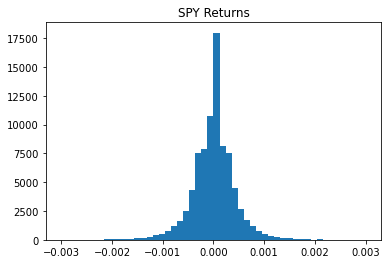

In [4]:
hist = plt.hist(df["RtnSPY"],range=(-0.003,0.003),bins=50)
title = plt.title("SPY Returns")
M1 = np.mean(df["RtnSPY"])
M2 = np.var(df["RtnSPY"])
M3 = scipy.stats.skew(df["RtnSPY"])
M4 = scipy.stats.kurtosis(df["RtnSPY"])

print("Mean {:.8f}\nVar  {:.8f}\nSkew {:.8f}\nKurt {:.8f}".format(M1, M2, M3, M4))

## Normal Distribution Features

$$Mean: \mu$$
$$Variance: \sigma^2$$
$$Skew: 0$$
$$Kurtosis: 3 $$ 

## Graphing Copulas

In [5]:
def graph_cop(x,y):
    f = plt.figure()
    graph = plt.scatter(df[x],df[y],alpha=0.5)
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df[x], df[y])
    kt = scipy.stats.kendalltau(df[x],df[y])[0]
    sr = scipy.stats.spearmanr(df[x],df[y])[0]
    plt.title('Minute Simple Returns')
    plt.xlabel(x[3:] + " Returns")
    plt.ylabel(y[3:] + " Returns")
    plt.show()
    return {"Beta":slope,"Alpha":intercept, "Pearson Rho":r_value, "Kendall Tau":kt, "Spearman Rho":sr}


In [16]:
df.corr()

,RtnXLE,RtnXLF,RtnXLP,RtnXLB,RtnXLU,RtnXLV,RtnXLY,RtnXLK,RtnSPY,RtnXLI
RtnXLE,1.000000,0.157084,0.120589,0.191092,0.137020,0.148765,0.167659,0.159106,0.182910,0.182129
RtnXLF,0.157084,1.000000,0.433117,0.628106,0.374472,0.514334,0.623325,0.594968,0.703495,0.642274
RtnXLP,0.120589,0.433117,1.000000,0.530469,0.638647,0.503014,0.611920,0.530633,0.525999,0.572687
RtnXLB,0.191092,0.628106,0.530469,1.000000,0.470406,0.588923,0.717263,0.681275,0.732926,0.746828
RtnXLU,0.137020,0.374472,0.638647,0.470406,1.000000,0.442593,0.468255,0.403650,0.445760,0.535175
RtnXLV,0.148765,0.514334,0.503014,0.588923,0.442593,1.000000,0.610659,0.608205,0.627671,0.648333
RtnXLY,0.167659,0.623325,0.611920,0.717263,0.468255,0.610659,1.000000,0.721144,0.741734,0.752626
RtnXLK,0.159106,0.594968,0.530633,0.681275,0.403650,0.608205,0.721144,1.000000,0.722683,0.684519
RtnSPY,0.182910,0.703495,0.525999,0.732926,0.445760,0.627671,0.741734,0.722683,1.000000,0.730685
RtnXLI,0.182129,0.642274,0.572687,0.746828,0.535175,0.648333,0.752626,0.684519,0.730685,1.000000


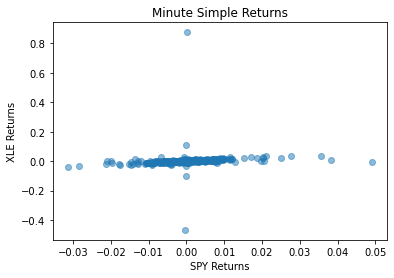

Beta :  0.9562466680058297
Alpha :  5.597418865764789e-06
Pearson Rho :  0.1829100449153855
Kendall Tau :  0.6277779704985902
Spearman Rho :  0.799548814383402




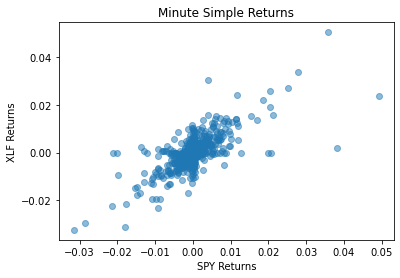

Beta :  0.9351059408141786
Alpha :  -2.631666621426798e-07
Pearson Rho :  0.7034954815107268
Kendall Tau :  0.46000803697790293
Spearman Rho :  0.6180614939791219




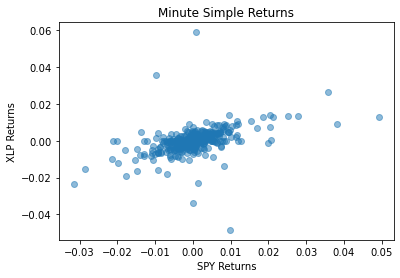

Beta :  0.4597370484122807
Alpha :  1.6413979826527187e-08
Pearson Rho :  0.5259993614528494
Kendall Tau :  0.393593773465388
Spearman Rho :  0.5313689598928114




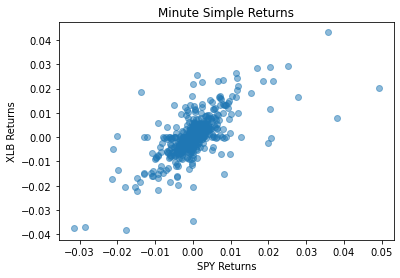

Beta :  0.9841884733459949
Alpha :  1.3465773129827196e-06
Pearson Rho :  0.7329261828076483
Kendall Tau :  0.5923049466858572
Spearman Rho :  0.7618927317563808




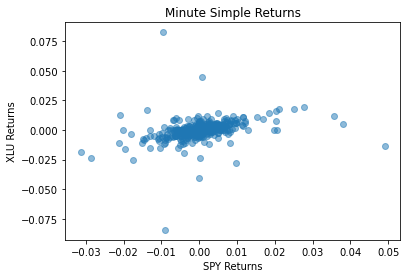

Beta :  0.5002667487853307
Alpha :  -8.746313513863166e-07
Pearson Rho :  0.4457600094027027
Kendall Tau :  0.4117026279967851
Spearman Rho :  0.5575956373579665




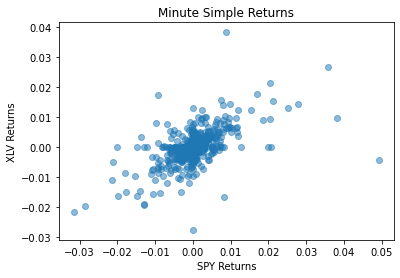

Beta :  0.558083395868312
Alpha :  -7.466487180594477e-07
Pearson Rho :  0.6276707495909821
Kendall Tau :  0.45788873608085623
Spearman Rho :  0.6101805245830587




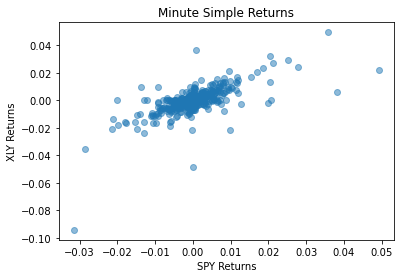

Beta :  0.9193868600657699
Alpha :  -4.948914378124222e-07
Pearson Rho :  0.7417335549344696
Kendall Tau :  0.5966721554255712
Spearman Rho :  0.7630102215808121




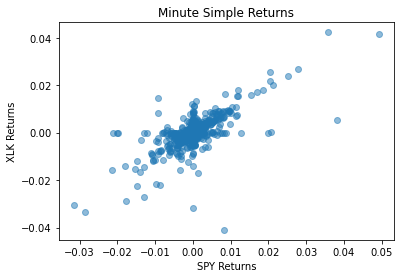

Beta :  0.8087264340474112
Alpha :  -2.2390355174291942e-07
Pearson Rho :  0.7226832331137483
Kendall Tau :  0.5041056364563054
Spearman Rho :  0.6664744822773288




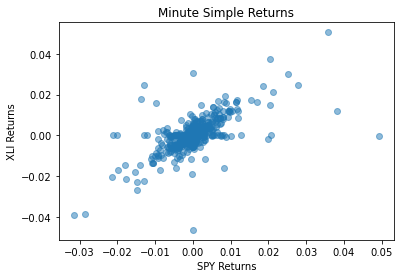

Beta :  0.8795125842289732
Alpha :  1.7229028413417211e-06
Pearson Rho :  0.7306846990259706
Kendall Tau :  0.6042766316188437
Spearman Rho :  0.7722251462931615




In [6]:
for val in ['RtnXLE','RtnXLF','RtnXLP','RtnXLB','RtnXLU','RtnXLV','RtnXLY', 'RtnXLK', 'RtnXLI']:
    params = graph_cop("RtnSPY",val)
    for k in params.keys():
        print(k, ": ", params[k])
    print()
    print()
        

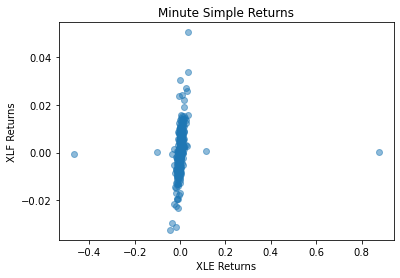

Beta :  0.039939202835296485
Alpha :  7.789187883876044e-07
Pearson Rho :  0.15708411408601367
Kendall Tau :  0.37823994579112297
Spearman Rho :  0.5168098456758271




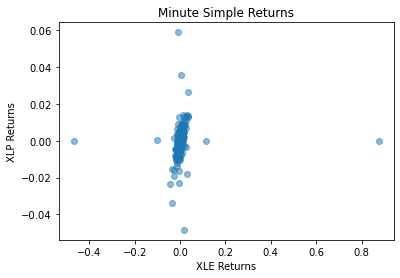

Beta :  0.020160358072330572
Alpha :  5.251024575540723e-07
Pearson Rho :  0.12058862234187427
Kendall Tau :  0.3317114149275699
Spearman Rho :  0.45206162312435655




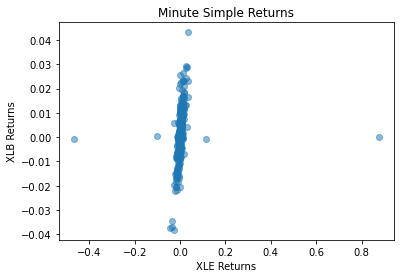

Beta :  0.04908268627235744
Alpha :  2.394405651958398e-06
Pearson Rho :  0.19109206965613154
Kendall Tau :  0.5336492028944765
Spearman Rho :  0.698343833186291




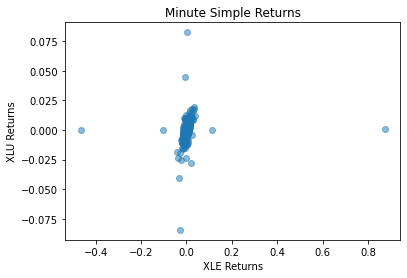

Beta :  0.02941384607297486
Alpha :  -3.730331243902203e-07
Pearson Rho :  0.13701990439686249
Kendall Tau :  0.36244344992765565
Spearman Rho :  0.4946010196903881




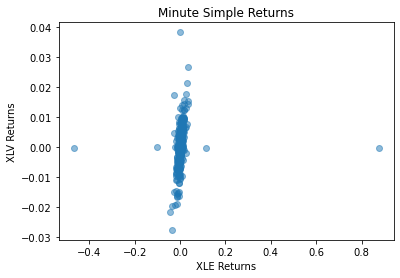

Beta :  0.0253008901263735
Alpha :  -1.348931956560975e-07
Pearson Rho :  0.14876506896198485
Kendall Tau :  0.3748632462669579
Spearman Rho :  0.5079387518844276




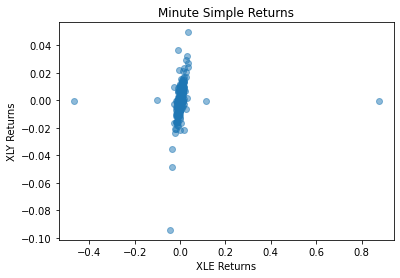

Beta :  0.03975063095656008
Alpha :  5.263226765956028e-07
Pearson Rho :  0.16765867856212097
Kendall Tau :  0.48707373882547966
Spearman Rho :  0.6438190162753632




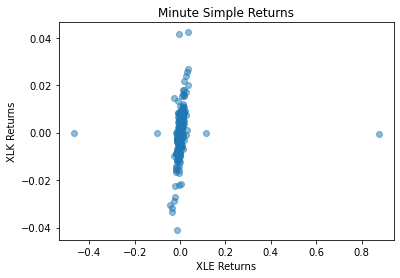

Beta :  0.03405714751393597
Alpha :  6.807082703851984e-07
Pearson Rho :  0.15910615810052486
Kendall Tau :  0.41164538401749534
Spearman Rho :  0.5562380439481449




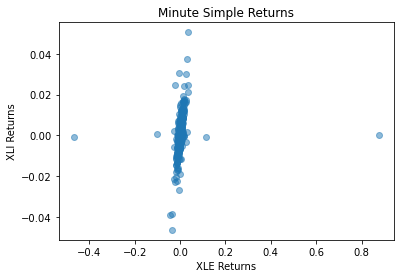

Beta :  0.04193335440005519
Alpha :  2.672687176127083e-06
Pearson Rho :  0.1821293502844597
Kendall Tau :  0.5063437204469061
Spearman Rho :  0.6674441030999946




In [7]:
for val in ['RtnXLF','RtnXLP','RtnXLB','RtnXLU','RtnXLV','RtnXLY', 'RtnXLK', 'RtnXLI']:
    params = graph_cop("RtnXLE",val)
    for k in params.keys():
        print(k, ": ", params[k])
    print()
    print()

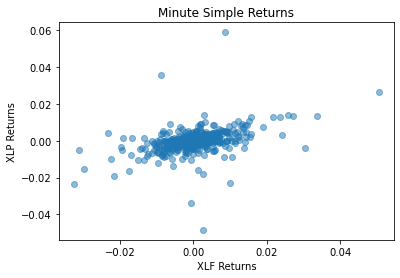

Beta :  0.2847934579509939
Alpha :  3.643054813924572e-07
Pearson Rho :  0.43311699599303516
Kendall Tau :  0.28411535770383484
Spearman Rho :  0.3865724387457704




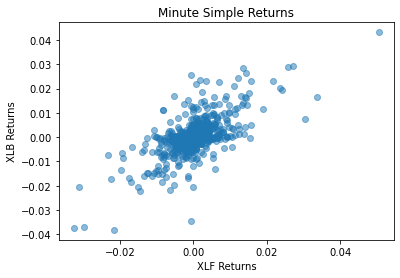

Beta :  0.6345293953744193
Alpha :  2.065076076571949e-06
Pearson Rho :  0.6281063906274822
Kendall Tau :  0.3876773962985859
Spearman Rho :  0.5241230479893705




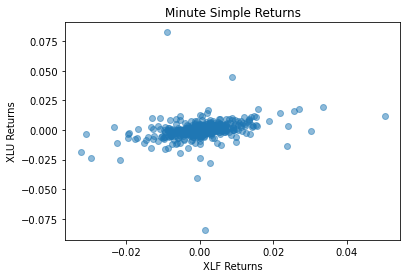

Beta :  0.3161698162958109
Alpha :  -5.026930832561058e-07
Pearson Rho :  0.3744720230744687
Kendall Tau :  0.28897235830481016
Spearman Rho :  0.3963853528282888




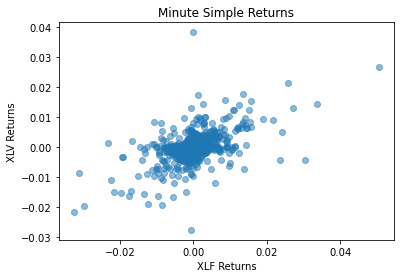

Beta :  0.34404320867575816
Alpha :  -3.2256953168190795e-07
Pearson Rho :  0.5143340564934821
Kendall Tau :  0.31641656041177024
Spearman Rho :  0.4301119479114686




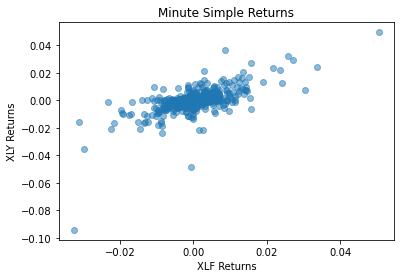

Beta :  0.581253022540615
Alpha :  1.8844476491163777e-07
Pearson Rho :  0.6233247360986423
Kendall Tau :  0.39699081190385765
Spearman Rho :  0.5338696486432061




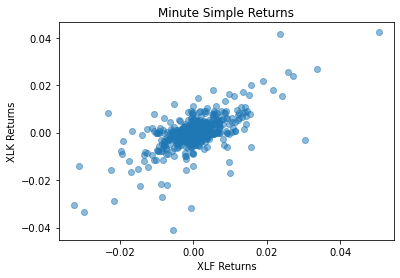

Beta :  0.5008960357970454
Alpha :  3.8816548961024257e-07
Pearson Rho :  0.5949677676648025
Kendall Tau :  0.34853758915541494
Spearman Rho :  0.47273305674043553




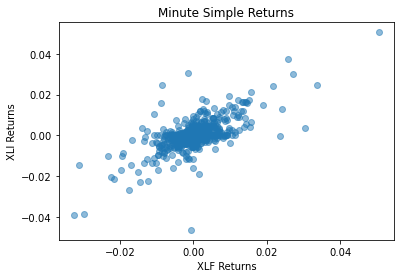

Beta :  0.5816112993870836
Alpha :  2.3495937032293643e-06
Pearson Rho :  0.6422739300332893
Kendall Tau :  0.3978672321394753
Spearman Rho :  0.53645326574867




In [8]:
for val in ['RtnXLP','RtnXLB','RtnXLU','RtnXLV','RtnXLY', 'RtnXLK', 'RtnXLI']:
    params = graph_cop("RtnXLF",val)
    for k in params.keys():
        print(k, ": ", params[k])
    print()
    print()

In [ ]:
corr []'RtnXLP','RtnXLB','RtnXLU','RtnXLV','RtnXLY', 'RtnXLK', 'RtnXLI'

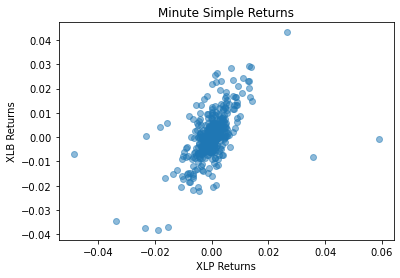

Beta :  0.8149930723701773
Alpha :  2.193278148968113e-06
Pearson Rho :  0.5304691910155425
Kendall Tau :  0.3403764589812647
Spearman Rho :  0.45875731954359994




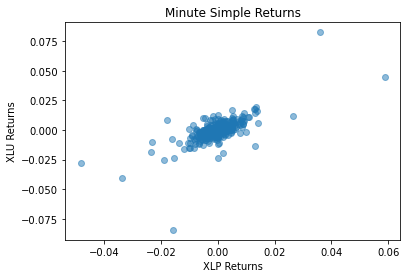

Beta :  0.8200445814417514
Alpha :  -7.14155857565293e-07
Pearson Rho :  0.6386474992034015
Kendall Tau :  0.31982333454400375
Spearman Rho :  0.43119798042977764




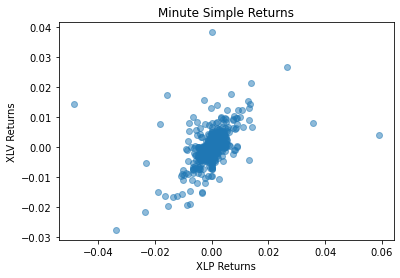

Beta :  0.5117092550861813
Alpha :  -2.994978498043052e-07
Pearson Rho :  0.5030143178904748
Kendall Tau :  0.3456563416507067
Spearman Rho :  0.46169805268122804




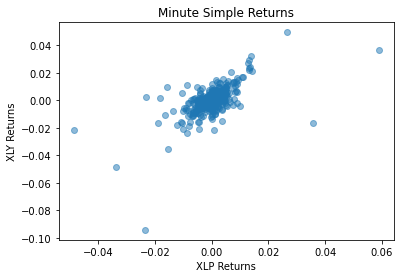

Beta :  0.8678021073565971
Alpha :  2.2524134742662195e-07
Pearson Rho :  0.6119199614505223
Kendall Tau :  0.37231425521899675
Spearman Rho :  0.49675888597987483




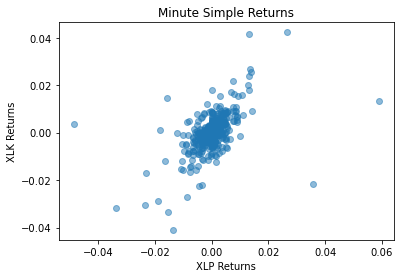

Beta :  0.679397581429675
Alpha :  4.653932072823889e-07
Pearson Rho :  0.5306334493150424
Kendall Tau :  0.32978637673513367
Spearman Rho :  0.44355083879150364




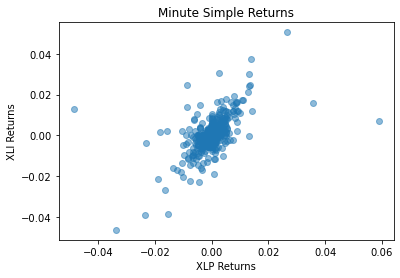

Beta :  0.7886879851934142
Alpha :  2.4393916851354923e-06
Pearson Rho :  0.5726871868632812
Kendall Tau :  0.3717587341826982
Spearman Rho :  0.4975340098613914




In [9]:
for val in ['RtnXLB','RtnXLU','RtnXLV','RtnXLY', 'RtnXLK', 'RtnXLI']:
    params = graph_cop("RtnXLP",val)
    for k in params.keys():
        print(k, ": ", params[k])
    print()
    print()

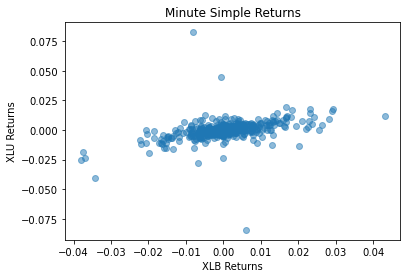

Beta :  0.3931473972391057
Alpha :  -1.2441060445992677e-06
Pearson Rho :  0.470406061114912
Kendall Tau :  0.3569840880654055
Spearman Rho :  0.4832426835170755




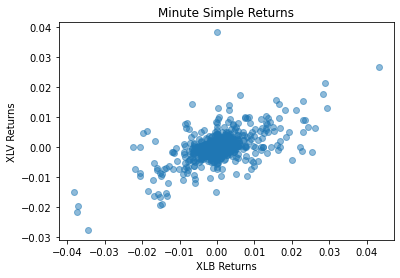

Beta :  0.3899489920960121
Alpha :  -1.0257891078222225e-06
Pearson Rho :  0.5889231532184115
Kendall Tau :  0.38398292060371225
Spearman Rho :  0.5154400370525842




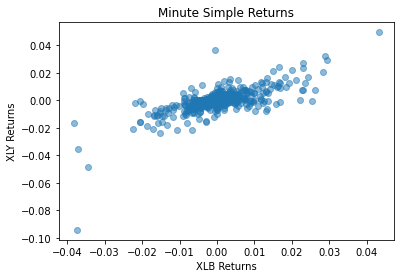

Beta :  0.662080516343464
Alpha :  -1.008575085937696e-06
Pearson Rho :  0.7172630841151576
Kendall Tau :  0.507757989589014
Spearman Rho :  0.6627017925361535




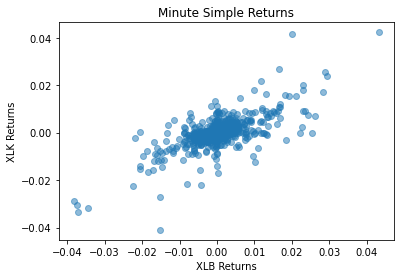

Beta :  0.5677515649122226
Alpha :  -6.35716076092684e-07
Pearson Rho :  0.6812754164135548
Kendall Tau :  0.4330264182921656
Spearman Rho :  0.5778116508466448




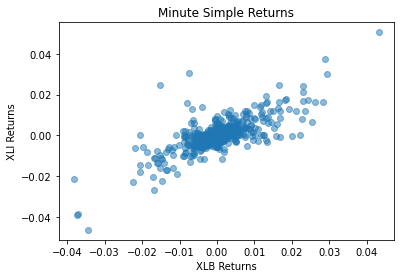

Beta :  0.6694445233139115
Alpha :  1.1328090221384517e-06
Pearson Rho :  0.7468279895088172
Kendall Tau :  0.5194358981125385
Spearman Rho :  0.6770920083622463




In [10]:
for val in ['RtnXLU','RtnXLV','RtnXLY', 'RtnXLK', 'RtnXLI']:
    params = graph_cop("RtnXLB",val)
    for k in params.keys():
        print(k, ": ", params[k])
    print()
    print()

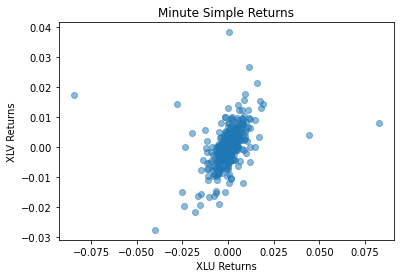

Beta :  0.35064752968456936
Alpha :  1.0002140156468713e-07
Pearson Rho :  0.4425925569231732
Kendall Tau :  0.33485205527615547
Spearman Rho :  0.45224248266799183




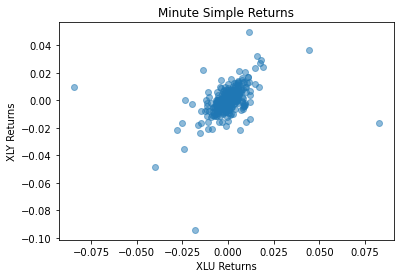

Beta :  0.5171682072307637
Alpha :  8.897088000215208e-07
Pearson Rho :  0.46825452878446283
Kendall Tau :  0.3672887930826796
Spearman Rho :  0.4946326788450321




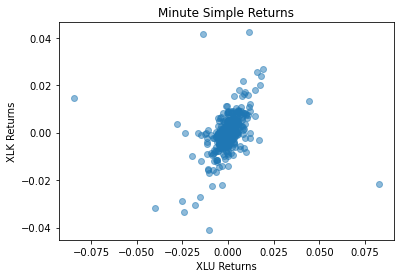

Beta :  0.4024926369819692
Alpha :  9.851970518604143e-07
Pearson Rho :  0.40364986708236156
Kendall Tau :  0.32267736936203323
Spearman Rho :  0.4384390863678014




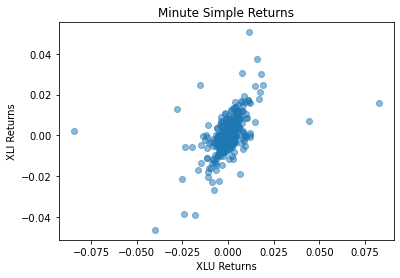

Beta :  0.5739938975157318
Alpha :  3.060822787034839e-06
Pearson Rho :  0.5351749339307906
Kendall Tau :  0.3821413406708071
Spearman Rho :  0.5143796200225511




In [11]:
for val in ['RtnXLV','RtnXLY', 'RtnXLK', 'RtnXLI']:
    params = graph_cop("RtnXLU",val)
    for k in params.keys():
        print(k, ": ", params[k])
    print()
    print()

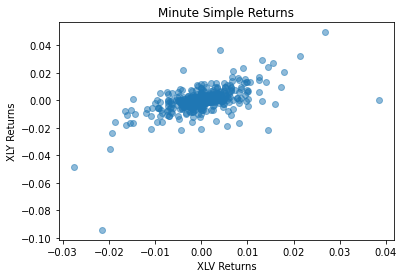

Beta :  0.8512981657213099
Alpha :  7.676720644522188e-07
Pearson Rho :  0.610658691294263
Kendall Tau :  0.4194761527721308
Spearman Rho :  0.5552220977135272




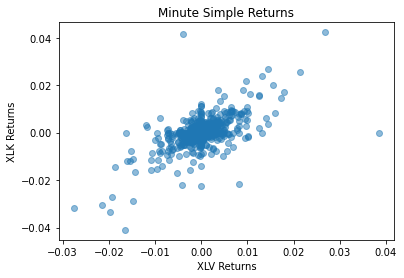

Beta :  0.7654840761633728
Alpha :  8.860131863569829e-07
Pearson Rho :  0.6082046162971327
Kendall Tau :  0.37700773991142883
Spearman Rho :  0.5039786829798565




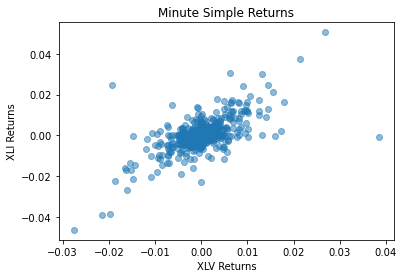

Beta :  0.8776934206953854
Alpha :  2.9281207891707575e-06
Pearson Rho :  0.6483328233205914
Kendall Tau :  0.41976703036863994
Spearman Rho :  0.5576282831223099




In [13]:
for val in ['RtnXLY', 'RtnXLK', 'RtnXLI']:
    params = graph_cop("RtnXLV",val)
    for k in params.keys():
        print(k, ": ", params[k])
    print()
    print()

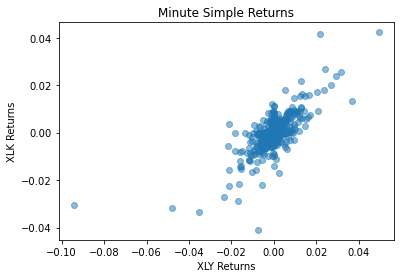

Beta :  0.6510666042727318
Alpha :  3.9483989817493105e-07
Pearson Rho :  0.7211442176972517
Kendall Tau :  0.4674653812285153
Spearman Rho :  0.6145525895504178




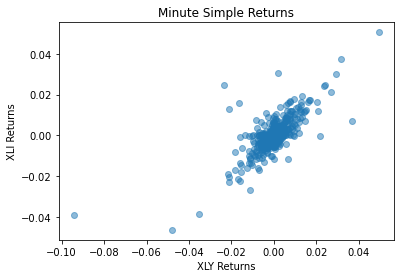

Beta :  0.7308715520196412
Alpha :  2.3774927016431252e-06
Pearson Rho :  0.7526262810935878
Kendall Tau :  0.5349619545464984
Spearman Rho :  0.6902744302279146




In [14]:
for val in ['RtnXLK', 'RtnXLI']:
    params = graph_cop("RtnXLY",val)
    for k in params.keys():
        print(k, ": ", params[k])
    print()
    print()

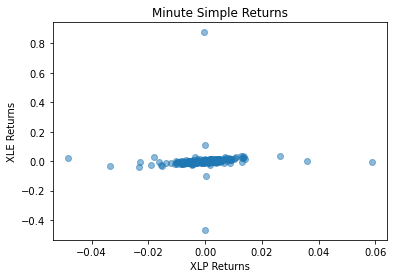

Beta :  0.7212974980969743
Alpha :  6.467012636632191e-06
Pearson Rho :  0.12058862234187427
Kendall Tau :  0.3317114149275699
Spearman Rho :  0.45206162312435655




In [17]:
for val in ['RtnXLE']:
    params = graph_cop("RtnXLP",val)
    for k in params.keys():
        print(k, ": ", params[k])
    print()
    print()

In [ ]:
# Kendalls Tau - rank correlation: 
    #1 represents all pairs are concordant
    #0 represents equal number of concordant and discordant pairs
    #-1 represents all pairs are discordant
    
# Spearmans Rho - correlation of ranks of points:
    #1 represents ranks of x = ranks of y
    #0 represents no correlation between ranks of x and ranks of y
    #-1 represents ranks of x are oppostie to ranks of y